# Dataset used from https://www.kaggle.com/mirichoi0218/insurance

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/drive/My Drive/datasets/datasets_13720_18513_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df_one_hot = pd.get_dummies(df,columns=['sex','smoker'],drop_first=True)


In [7]:
df_one_hot.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [8]:
le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['sex'])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_label
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [10]:
le.inverse_transform(df['sex_label'])

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [11]:
df2 = df

In [12]:
le.fit(df2.sex.drop_duplicates())
df2.sex = le.fit_transform(df2.sex)

le.fit(df2.smoker.drop_duplicates())
df2.smoker = le.fit_transform(df2.smoker)

In [13]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,sex_label
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,1
2,28,1,33.000,3,0,southeast,4449.46200,1
3,33,1,22.705,0,0,northwest,21984.47061,1
4,32,1,28.880,0,0,northwest,3866.85520,1


In [14]:
df2.drop(columns=['sex_label'],inplace=True)

In [15]:
le.fit(df2.region.drop_duplicates())
df2.region = le.fit_transform(df2.region)


In [16]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df2.region.unique()

array([3, 2, 1, 0])

In [18]:
df2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


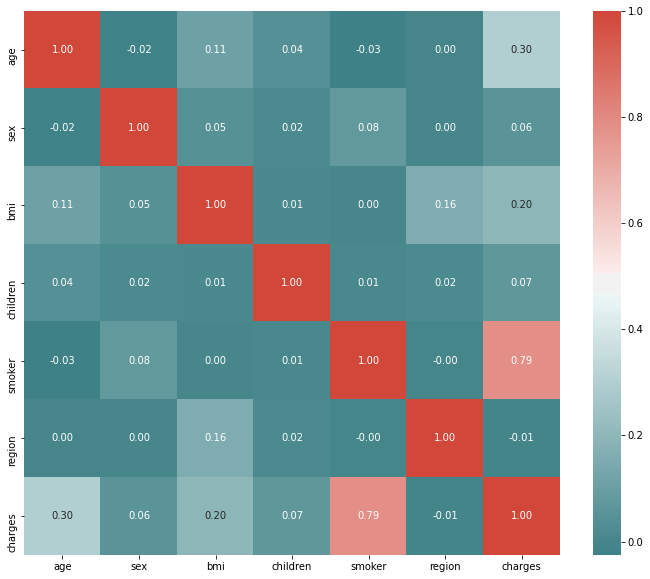

In [19]:
f, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap=sns.diverging_palette(200,15,as_cmap=True),ax=ax)

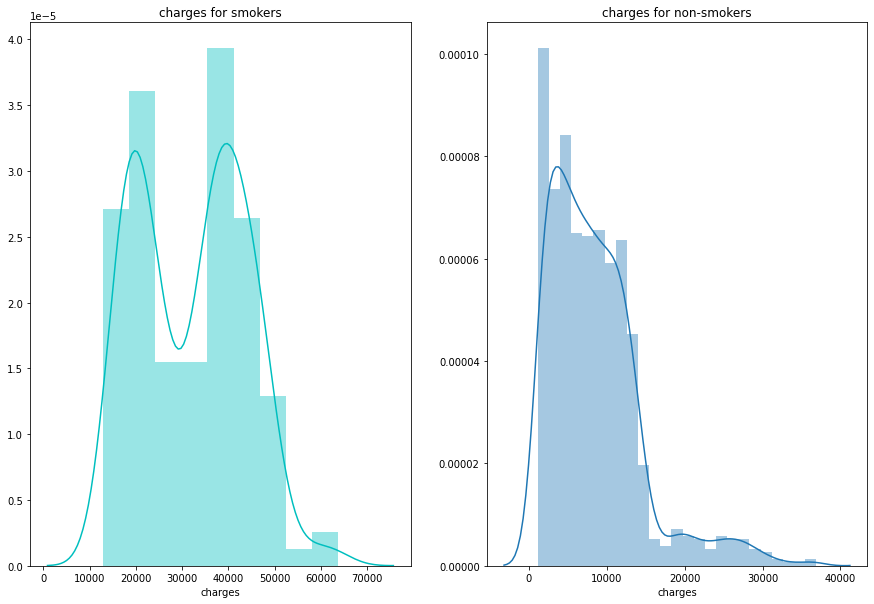

In [20]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.set_title('charges for smokers')
sns.distplot(df2[(df2.smoker==1)]['charges'],color='c',ax=ax)

ax = f.add_subplot(122)
ax.set_title('charges for non-smokers')
sns.distplot(df2[(df2.smoker==0)]["charges"],ax=ax)

Text(0.5, 1.0, 'smokers and non-smokers')

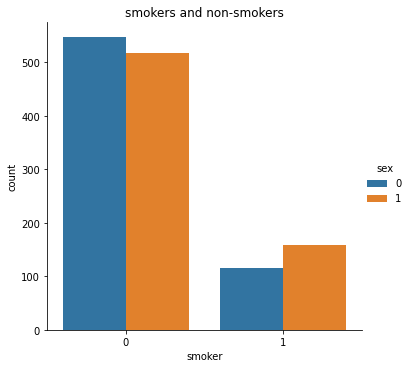

In [21]:
sns.catplot(data=df2[(df2.age>=18)],x='smoker',kind='count',hue='sex')
plt.title("smokers and non-smokers")

In [43]:
x = df2.drop(columns=['charges'],axis=1)
y = df2.charges

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)


In [44]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_train_pred = linear_reg.predict(x_train)
y_test_pred = linear_reg.predict(x_test)

print(linear_reg.score(x_test,y_test))

0.7177371221643137


In [25]:
random_forest = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=10,n_jobs=-1)
random_forest.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [26]:
random_forest_train_pred = random_forest.predict(x_train)
random_forest_test_pred = random_forest.predict(x_test)

In [27]:
print('MSE train data : %.2f, MSE Test data : %.2f' %(mean_squared_error(y_train,random_forest_train_pred),mean_squared_error(y_test,random_forest_test_pred)))

MSE train data : 3402216.21, MSE Test data : 23068688.15


In [28]:
print('r2 train data : %.2f, r2 Test data : %.2f' %(r2_score(y_train,random_forest_train_pred),r2_score(y_test,random_forest_test_pred)))

r2 train data : 0.98, r2 Test data : 0.83


In [29]:
grid = {'n_estimators':np.arange(100,150)}
cv=KFold(n_splits=10,shuffle=True)

In [30]:
rf=RandomForestRegressor()
clf = GridSearchCV(rf,grid,n_jobs=-1,cv=cv)
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimator

In [39]:
clf.best_params_

{'n_estimators': 148}

In [36]:
clf_train_pred = clf.predict(x_train)
clf_test_pred = clf.predict(x_test)

In [37]:
print('MSE train data : %.2f, MSE Test data : %.2f' %(mean_squared_error(y_train,clf_train_pred),mean_squared_error(y_test,clf_test_pred)))

MSE train data : 3346192.12, MSE Test data : 22744170.72


In [38]:
print('r2 train data : %.2f, r2 Test data : %.2f' %(r2_score(y_train,clf_train_pred),r2_score(y_test,clf_test_pred)))

r2 train data : 0.98, r2 Test data : 0.83
